In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:

data.shape

(30, 2)

In [5]:
x = data.iloc[:,0].values
x = np.reshape(x,newshape=(-1,1))
y = data.iloc[:,1].values

In [6]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [7]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

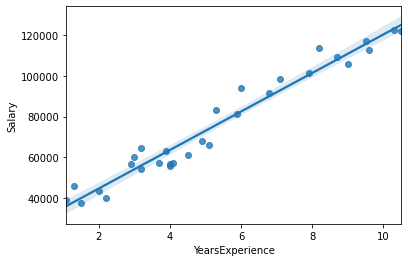

In [8]:
sns.regplot(x='YearsExperience', y='Salary',data=data)

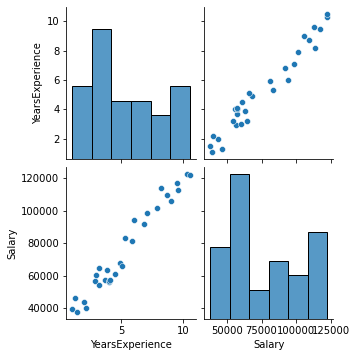

In [9]:
sns.pairplot(data)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 5,test_size = 0.3)

In [11]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
linear_model.fit(x_test,y_test)

LinearRegression()

In [12]:
y_train_pred = linear_model.predict(x_train)
y_train_pred

array([ 91802.56590851, 123715.37387632,  31966.05096887,  73851.61142661,
        49917.00545076,  33960.60146685, 116734.44713336,  60887.03318969,
        88810.74016153,  80832.53816957, 107758.96989241,  52908.83119774,
        42936.0787078 ,  52908.83119774,  57895.20744271,  71857.06092863,
        99780.76790046,  50914.28069975,  69862.51043064,  65873.40943466,
        40941.52820981])

In [13]:
y_test_pred = linear_model.predict(x_test)
y_test_pred

array([ 60887.03318969, 125709.9243743 , 102772.59364744, 110750.79563939,
        79835.26292058,  59889.7579407 ,  35955.15196484,  61884.30843869,
       115737.17188436])

In [14]:
from sklearn.metrics import mean_squared_error,r2_score

In [15]:
print('mse : {}.'.format(mean_squared_error(y_train,y_train_pred)))
print('r2_score : {}.'.format(r2_score(y_train,y_train_pred)))

mse : 42560671.47448932.
r2_score : 0.9315412905350918.


In [16]:
print('mse : {}.'.format(mean_squared_error(y_test,y_test_pred)))
print('r2_score : {}.'.format(r2_score(y_test,y_test_pred)))

mse : 25600841.783295143.
r2_score : 0.9711084766604643.


In [17]:
linear_model.coef_

array([9972.75248994])

In [18]:
linear_model.intercept_

20996.023229930637

In [19]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(x_train)
X_test = std_scaler.fit_transform(x_test)

In [20]:
import statsmodels.formula.api as smf
model = smf.ols('x~y',data = data).fit()
model

In [21]:
model.params

Intercept   -2.383161
y            0.000101
dtype: float64

In [22]:
model.pvalues

Intercept    6.300123e-08
y            1.143068e-20
dtype: float64

In [23]:
model.aic,model.rsquared

(56.33643978306448, 0.9569566641435086)

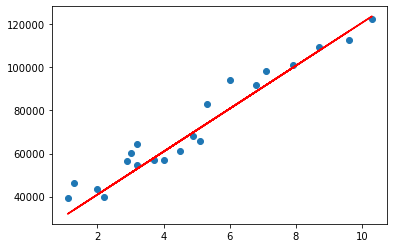

In [24]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_train_pred,color='red')

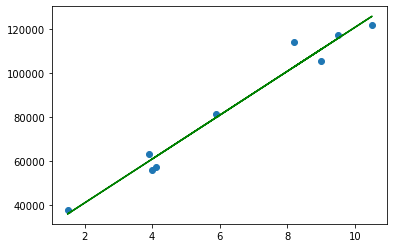

In [25]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_test_pred,color='green')